# Homework 4: Apply k-NN and Linear Regression
DATA 202 FA19 @ Calvin University

**Due**: Thursday October 10 @ 11:59pm

## Purpose

In this homework, you will apply what you learned in Homework 3 in a different situation. You'll also use the same tools to fit a linear regression, and compare and contrast the two modeling approaches.

After completing this assignment, you should be more comfortable with:

* The concepts of training and testing data
* The similarities and differences between Nearest-Neighbors regression and Linear Regression
* The sklearn regression API
* Working with Pandas DataFrames.

## Tasks

The instructions below will guide you through completing this assignment. A few strategic recommendations:

* Read through the whole thing before starting to get an overview
* Identify something that's unclear, or some knowledge you might be missing, and ask a question on Piazza.
* As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach.
* **Avoid** getting stuck on one part for a long time. Take breaks.
* Try not to Google anything or copy code off the Internet. You should be able to do this referring only to:
  - your hw3 "notes" (and maybe your solutions)
  - the Pandas documentation (remember the shift-tab-tab trick in Jupyter Notebook, and the links in the Help menu
  - the Data 100 textbook
* Check your understanding as you go. Master this.


Before you begin, please fill out [THIS GOOGLE FORM](https://docs.google.com/forms/d/e/1FAIpQLSdS1pi1AkbnnvXTwiVyz-BoB3yWtmysATlMVKDZcZEjV1RJJg/viewform?usp=sf_link).

## Criteria for Success

A successful submission will have these characteristics:

* All questions are answered
* All code is correct and succinct. (There should be no extraneous code.)
* Short answers should be *correct* (answering all parts), *clear* (easy to understand), and *concise*. Bullet points are fine if each point is a complete thought. (Use no more than 3 or 4 lines of text.)
* Where possible, free response answers should connect the *data* with the *real world*.
* Plots should be well documented: we will expect appropriate titles, axis labels, legends, etc. **The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?**

### How to Submit

Fill in the following information within this cell:

* **I worked with**:
* **One question I asked (either of another person, on Piazza, or of the Internet) was**: How do you check in Python that the assumptions for linear regression actually hold?
* **This assignment actually took me:** 3 hours?
* **The hardest part was**: figuring out how to do linear regression in Python

Then:

* Rename this file to `hw4_username.ipynb`, replacing `username` with your Calvin username
* Run `Kernel->Restart and Run All` and check that everything works.
* Submit your `ipynb` file (only) to Moodle.


# Question 1: Setup

You started working with the Capital Bike Share dataset in Homework 2. We're going to extend our work there to try to predict ridership.

Our basic goal will be to try to predict ridership in 2012 based on ridership data in 2011. So the 2011 data will be our *training set* and the 2012 data will be our *test set* (aka *held-out* data or sometimes *validation* data).

First, we'll load up the data.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Set some display settings.
sns.set(context='notebook')

In [2]:
hourly_counts_orig = pd.read_csv('data/hour.csv')
hourly_counts_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Question 1.1: Renaming
Some of those column names are pretty awful. It's as if the authors didn't know that they could (usually) tab-complete column names! Let's fix a few of them up. Use the `rename` method on the `hourly_counts_orig` DataFrame to rename the following columns:

old | new
---|----
dteday | date
hr | hour
mnth | month
cnt | riders

Store the result in a variable called `hourly_counts` (keeping `_orig` untouched).

*Try not to Google this. Look in the [Pandas user guide](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-rename).*

In [3]:
hourly_counts = hourly_counts_orig.rename(columns={"dteday": "date", "hr": "hour", "mnth": "month", "cnt": "riders"})

In [4]:
assert hourly_counts['hour'].max() == 23
assert hourly_counts['riders'].max() > 900

## Question 1.2: Train-Test Split
We're going to use 2011 as the training set and 2012 as the test set. **Make two new DataFrames based on `hourly_counts`, one called `train` containing only data from 2011, and one called `test` containing only 2012 data.**

The dataset already has a column, `yr`, which tells the two apart. I won't tell you what the values in the `yr` column mean; you can figure them out.

In [5]:
hourly_counts.yr.value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [6]:
dates = hourly_counts['date'][hourly_counts['yr'] == 1]
dates.head()

8645    2012-01-01
8646    2012-01-01
8647    2012-01-01
8648    2012-01-01
8649    2012-01-01
Name: date, dtype: object

In [7]:
train = hourly_counts[hourly_counts['yr'] == 0]
test = hourly_counts[hourly_counts['yr'] == 1]

In [8]:
assert train['date'].iloc[0] == '2011-01-01'
assert test['date'].iloc[0] == '2012-01-01'
assert all(train['date'].str.startswith('2011'))
assert all(test['date'].str.startswith('2012'))
assert len(train) + len(test) == len(hourly_counts)

## Question 1.3: Sizes
1. How many observations are in the training set and the test set?
2. How many observations should there be? How many are missing?
3. Can you come up with a guess of why some observations might be missing? (there are many possible answers here)


In [9]:
print("{} train, {} test".format(len(train), len(test)))
print("Train + test:", len(train) + len(test))
print("total in hourly counts:", len(hourly_counts))

8645 train, 8734 test
Train + test: 17379
total in hourly counts: 17379


**8645 observations in training set, 8734 in test set. There should be 17379 total, since that's the number of rows in hourly counts. There are 17379 total, so I don't see any missing observations. If there were missing observations, it could be because the observation had no value for year or was a year other than 2011 or 2012.**

# Question 2: Predicting Ridership using a Single Predictor

What would be some simple predictors of ridership? One that comes to mind is temperature: sometimes it's just too cold to bike. Let's try using temperature to predict ridership.

## Question 2.1
The following code makes a scatterplot that attempts to show how ridership depends on temperature.

1. What is one observation you can make about this relationship based on this graph? Use "real world" language as much as you can.
2. What's one thing that's unclear about this graph? (What makes the relationship hard to see?) What's one thing you might change to improve it? (You don't have to actually make that change.)

*Note*: Temperature was "normalized" (we'll discuss more about this shortly). Here's how the dataset page says they computed it:

```
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
```


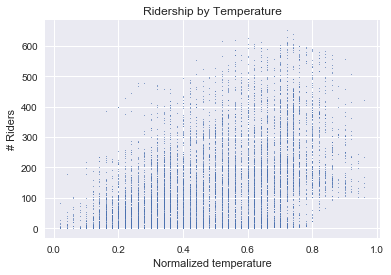

In [10]:
plt.scatter(train['temp'], train['riders'], s=.3)
plt.xlabel("Normalized temperature")
plt.ylabel("# Riders")
plt.title("Ridership by Temperature");

1. There is a very weak trend that warmer hours have more riders.
2. Because temperature is normalized, it's hard to see at what temperatures riders are unwilling to ride.

## Question 2.2
Fit a Nearest-Neighbors model to the training data, using the same predictor (`temp`) and response (`riders`). Plot the model's predictions on top of a scatterplot of the data.

*Note* This should be extremely familiar from hw3. If you need to copy-paste the new-axis stuff that's fine, but try to do the k-NN and plotting from just your notes.

*Hint*: Try `train[['temp']].values`.

### Step 1: Extract the training data
Make variables `train_x` and `train_y` containing the data for this prediction problem.

In [11]:
train_x = train[['temp']].values
train_x += np.random.normal(scale=1e-6, size=train_x.shape)  # add noise
train_y = train['riders'].values

In [12]:
assert train_x.ndim == 2
assert train_x.shape[1] == 1
assert train_y.ndim == 1
assert len(train_x) == len(train_y)

### Step 2: Train the k-NN model on the training data
Call it `knn`. Use 5 neighbors.

In [13]:
knn = KNeighborsRegressor(5)
knn.fit(train_x, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [14]:
assert knn.n_neighbors == 5

### Step 3: Evaluate what the model predicts for each temperature.

Make variables called `x` and `y_predicted`

In [15]:
x = np.linspace(start=0, stop=1, num=100)[:, None]
y_predicted = knn.predict(x)

### Step 4: Make the plot.
Remember to label it. Try to make both the predictions and the raw data show up clearly.

Text(0,0.5,'# Riders')

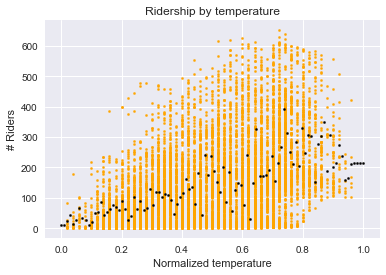

In [16]:
plt.scatter(train_x, train_y, color = "orange", s=5)
plt.scatter(x, y_predicted, color="black", s=5)
plt.title("Ridership by temperature")
plt.xlabel("Normalized temperature")
plt.ylabel("# Riders")

## Question 2.3
What mean squared error does the 5-NN model get when predicting on the training data?

### Step 1: Make a prediction for each training-set observation.
Call it `train_y_predicted`.


In [17]:
train_y_predicted = knn.predict(train_x)

### Step 2: Write a function to compute the mean squared error.

In [18]:
def mean_squared_error(y_true, y_predicted):
    """Compute the MSE of a model that predicts y_predicted when the true answer was y_true.
    """
    assert len(y_true) == len(y_predicted)
    return np.mean((y_true - y_predicted)**2)


In [19]:
assert np.isclose(
    mean_squared_error(np.array([0, 0]), np.array([0, 2])),
    2.)

### Step 3: Check your MSE function against sklearn's MSE function.
Turns out sklearn's `metrics` module gives us what we need already. We'll use it going forward. You can just run this code, but read it to understand what it's doing.

In [20]:
assert np.allclose(
    mean_squared_error(train_y, train_y_predicted),
    metrics.mean_squared_error(y_true=train_y, y_pred=train_y_predicted))

assert mean_squared_error is not metrics.mean_squared_error

### Step 4: Compute the training MSE.
Label the printout so it's understandable without looking at the code or instructions. Use sklearn's `metrics.mean_squared_error` function.

**What units is the MSE in? Include that in your printout.**

In [21]:
print(metrics.mean_squared_error(y_true=train_y, y_pred=train_y_predicted), "riders squared")

11160.915206477732 riders squared


## Question 2.4
What MSE does this same 5-NN model get on the test data? How does that compare with the training MSE?

In [22]:
test_x = test[['temp']].values
test_y = test['riders'].values

In [23]:
test_y_predicted = knn.predict(test_x)

In [24]:
metrics.mean_squared_error(y_true=test_y, y_pred=test_y_predicted)

49092.43951454087

**This gets an MSE which is higher than the training MSE (as we would expect).**

# Question 3: Linear Regression
Now we're going to try a linear regression on the same task: predicting ridership from temperature.

### Question 3.1
Fit a linear regression ("ordinary least squares") model to the training data, using the same predictor (`temp`) and response (`riders`). Plot the model's predictions on top of a scatterplot of the data.

You can reuse variables you made in Question 2, like `x` and `train_x`, if they're still appropriate.

Use `LinearRegression`, which we imported from `sklearn` at the top. Call the model `linreg`.

In [25]:
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Question 3.2
Make the plot in Question 3.1 again, still using the same linear model, but implementing the math on your own instead of using `linreg.predict`.

The following expressions extract the parameters that sklearn computed for the linear model.

In [26]:
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Intercept: -5.374489434095494
Coefficients: [305.00601907]


Complete this function.

In [27]:
def my_linreg_predict(x, linreg):
    """Return the array of predicted values for each x value, using the supplied linreg model.
    """
    return linreg.coef_[0] * x + linreg.intercept_


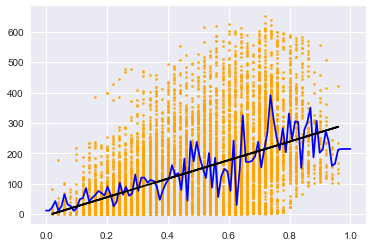

In [28]:
# Plot the graph again. Labeling not necessary this time.
y_hat = my_linreg_predict(train_x, linreg)
plt.scatter(train_x, train_y, color="orange", s=5)
plt.plot(x, y_predicted, color="blue")
plt.plot(train_x, y_hat, color="black")

### Question 3.3
What mean squared error does the linear regression model get when predicting on the training data?

In [29]:
metrics.mean_squared_error(train_y, y_hat)

14255.203876816247

## Question 3.4
What MSE does this same linear regression model get on the test data? How does that compare with its training MSE?

In [30]:
y_hat_test = linreg.predict(test_x)
metrics.mean_squared_error(test_y, y_hat_test)

44780.331560544175

**The test MSE is 44780, which is higher than the training MSE (as we would expect).**

## Question 3.5
Compare and contrast the 5-NN model and the linear regression model.

* In what ways is the 5-NN model better?
* In what ways is the Linear Regression model better?
* What sort of a pattern does it look like the data actually has? Do you think a linear model is a good fit for it?
* Which one would you use, if you had to pick? Why?

**5-NN model has 11262 training MSE, Linear Regression model has 14255 training MSE. 5-NN model has 45042 test MSE, Linear Regression model has 44780 test MSE. The 5-NN model has lower MSE in both cases, so it is better at fitting the data and making predictions. A Linear Regression model is better if you want to report the effect of temperature on number of riders - the 5-NN doesn't give you a nice, easy to explain coefficient.**

**I'm not sure how to describe the pattern of data, but it doesn't look linear. It also looks like variance (of the response) increases as temperature increases.**

**Using common sense, I would say a linear model is a bad choice. The linear model says the higher the temperature, the more people ride. But in the real world not as many people want to ride when it's really hot. So the relationship between temperature isn't linear - number of riders increases as temperature goes up to an "ideal" temperature, then the number of riders decreases as we get hotter than the ideal temperature.**

**There are several plots we can make to tell if a linear model is a good choice. I looked at [Simulating(Replicating) R regression plot in Python using sklearn](https://medium.com/@vikashrajluhaniwal/simulating-replicating-r-regression-plot-in-python-using-sklearn-4ee48a15b67) to figure out how to do some of those plots in Python.**

**The first is a residuals vs predicted plot. If there is a relationship between residuals and predicted, that means there is some significant relationship the model isn't explaining and thus this is a bad model.**

Text(0.5,1,'Residual plot')

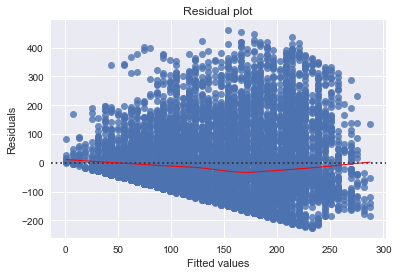

In [31]:
sns.residplot(y_hat.reshape(-1),'riders', data=train,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')

**It looks like a clear relationship here, which means this is not a good model. Another condition which must hold for  a linear model to be a good choice is that the residuals are normally distributed. I check that condition in the cell below.**

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normal Q-Q Plot')

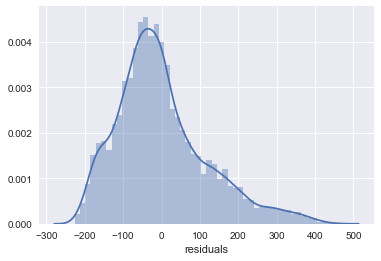

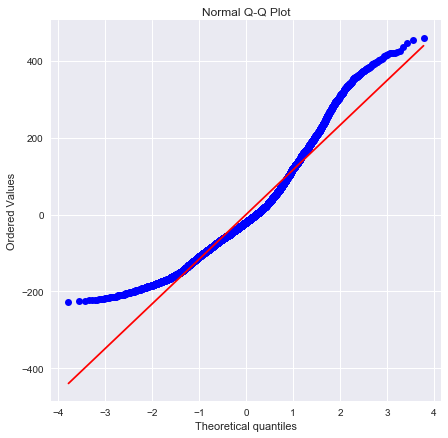

In [32]:
residuals = train["riders"] - y_hat.reshape(-1)
sns.distplot(residuals, axlabel="residuals")

import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

**The distribution plot looks skewed - a lot of weight in the right tail. Is it skewed enough? That's what we use the qq plot for. If things are good, the dots should more or less follow the line. But here we see a clear nonlinear relationship, indicating that the residuals have some distribution that is not normal. So this linear model is not a good choice.**

**I would choose the 5-NN model because as I determined above, the linear model is not a good choice.**

# Question 4
The comparison we made was between a 5-NN and a linear regression model. What if we had chosen a different $k$?

## Question 4.1

Assuming you have named all of your variables as requested, the code below should make a plot very similar to one you made in hw3. We also added a horizontal line for the linear regression's testing MSE.

1. What do you notice about this graph?
2. What value of $k$ should we choose?
3. Would you answer Question 3.5 any differently if using that chosen value of k?

In [ ]:
n_neighbors_vals = list(range(5, 500, 5))
training_mses = []
testing_mses = []
for n_neighbors in n_neighbors_vals:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(train_x, train_y)
    training_mses.append(metrics.mean_squared_error(train_y, knn.predict(train_x)))
    testing_mses.append(metrics.mean_squared_error(test_y, knn.predict(test_x)))

In [ ]:
plt.plot(n_neighbors_vals, training_mses, label="k-NN")
plt.hlines(
    metrics.mean_squared_error(y_true=train_y, y_pred=linreg.predict(train_x)),
    n_neighbors_vals[0], n_neighbors_vals[-1], label="Linear Regression")
plt.xlabel("k (# neighbors)")
plt.ylabel("mean squared error");
plt.title("Training Set MSEs, varying # neighbors")
plt.legend()
plt.xlim(n_neighbors_vals[0], n_neighbors_vals[-1]);

**As k increases, the MSE on the training set increases because we're getting closer to just predicting the mean.**

In [ ]:
if True: # Run this only once you've answered 4.1
    plt.plot(n_neighbors_vals, testing_mses, label="k-NN")
    plt.hlines(
        metrics.mean_squared_error(y_true=test_y, y_pred=linreg.predict(test_x)),
        n_neighbors_vals[0], n_neighbors_vals[-1], label="Linear Regression")
    plt.xlabel("k (# neighbors)")
    plt.ylabel("mean squared error");
    plt.legend()
    plt.xlim(n_neighbors_vals[0], n_neighbors_vals[-1]);

**We should choose the k that minimizes the MSE for test set (and isn't terrible for the training set). But I'm having a hard time telling what that is just by looking at the plot.**

In [ ]:
min_test = min(testing_mses)
print("Minimum test MSE: {} for k={}".format(min_test, (testing_mses.index(min_test) + 1)*5 ))

**So it looks like 30 is a reasonable value for k. I wouldn't answer Question 3.5 any better - KNN is still a good fit.**